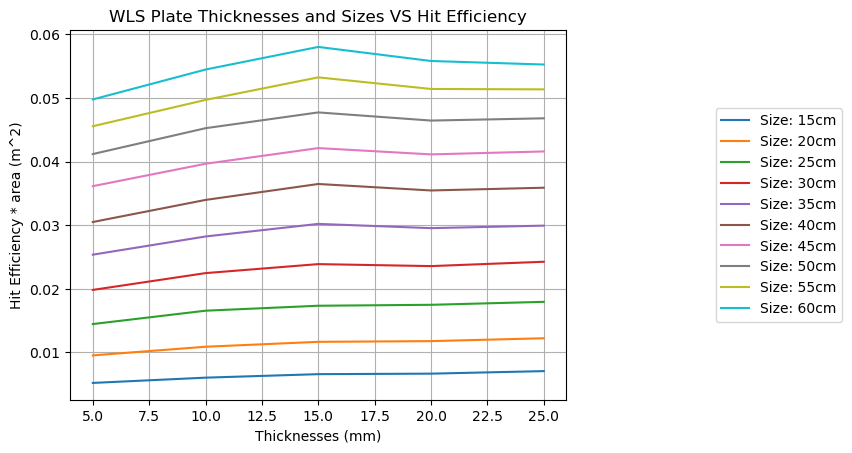

In [1]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math


nruns = 4500

thicknesses = np.arange(5,26,5) #mm
sizes = np.arange(15,61,5) #cm

satls = np.arange(2*1e-3,30*1e-3,5*1e-3) #m
latls = np.arange(2,5,0.5) #m

size = 60
thickness = 10
satl = 10*1e-3  # Short attenuation length
latl = 3.5  # Long attenuation length

rx, ry, rz = 0.0762/2, 40e-3, 0.0762/2  # PMT radii
area_half_pmt = (math.pi * rx**2)/2 #circle
vol_half_pmt = (4 * math.pi * (((rx*ry)**1.6 + (rx*rz)**1.6 + (ry*rz)**1.6)/3)**(1/1.6))/2

det_times = []
all_times = []
dist = []




for s in sizes:
#for la in latls:

    hit_eff = []
    det_av_time = []
    area_half_wls = ((s*1e-2)**2)/2
    area_total = area_half_wls - area_half_pmt
    #print(area_total)
    
    for th in thicknesses:
    #for sa in satls:
    
        vol_half_wls = ((th*1e-3) * (s*1e-2)**2)/2
        vol_total = vol_half_wls - vol_half_pmt
        #print(vol_total)

            
        #path = 'outputs/'
        #out_file = path + 'sim_output_' + str(int(thickness*1e+3)) + 'mm_' + str(int(size*1e+2)) + 'cm' + '.txt'
        path = 'outputs/thicknesses/seed(1)/' + str(th) + 'mm_' + str(s) + 'cm_'
        out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'
        #out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'
        out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data
        hits = np.where(out_data['Hit_coordinate_m'] != '[]')[0]
        det_times_ = out_data[hits]['Time_s']
        all_times_ = out_data['Time_s']
        det_times.append(det_times_)
        all_times.append(all_times_)
        det_av_time.append(np.mean(det_times_))
        hit_eff.append((len(hits)/nruns) * area_total)
        dist.append(out_data['Total_distance_m'])   

    plt.plot(thicknesses,hit_eff, label = 'Size: ' + str(int(s)) + 'cm')
    #plt.plot(satls,hit_eff, label = 'Long Attenuation Length: ' + str(latl) + 'm')


plt.xlabel("Thicknesses (mm)")
#plt.xlabel("Short Attenuation Lengths (m)")
plt.ylabel("Hit Efficiency * area (m^2)")
#plt.ylabel("Hit Efficiency (%)")
#plt.title("WLS Plate Attenuation Lengths VS Hit Efficiency\nFor a 30 cm X 30cm X 10mm WLS Plate")
plt.title("WLS Plate Thicknesses and Sizes VS Hit Efficiency")
plt.legend(loc='center right', bbox_to_anchor=(1.57, 0.5))
plt.grid()
plt.show()


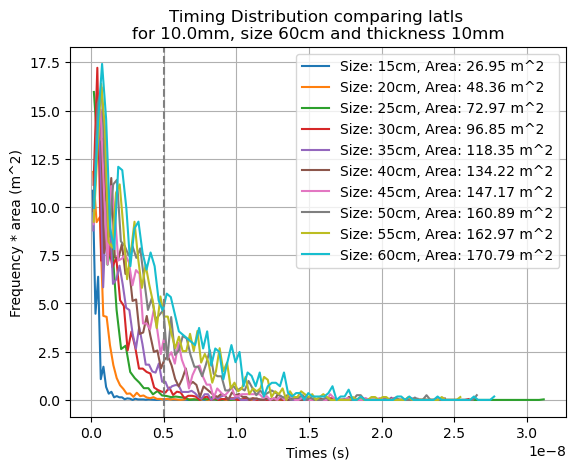

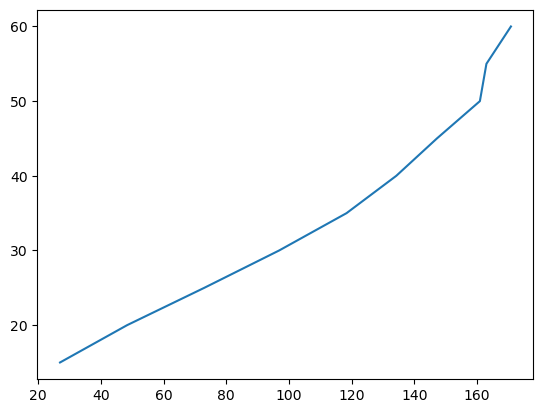

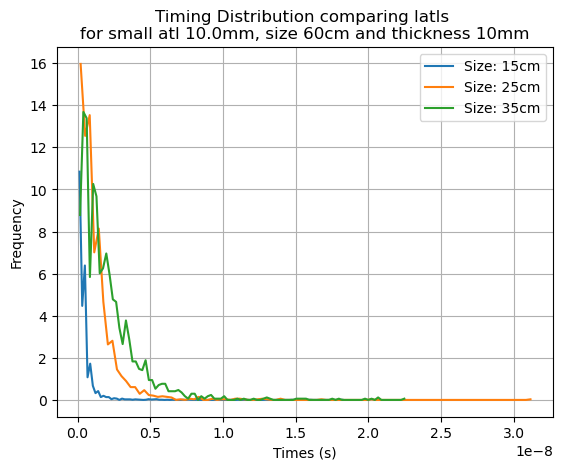

In [14]:
size = 60
thickness = 10
satl = 10*1e-3  # Short attenuation length
latl = 3.5  # Long attenuation length

rx, ry, rz = 0.0762/2, 40e-3, 0.0762/2  # PMT radii
area_half_pmt = (math.pi * rx**2)/2 #circle
hist = []
det_times = []
areas = []

for s in sizes:
#for latl in latls:

    area_half_wls = ((s*1e-2)**2)/2
    area_total = area_half_wls - area_half_pmt

    path = 'outputs/thicknesses/seed(1)/' + str(thickness) + 'mm_' + str(s) + 'cm_'
    out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'
    out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data
    hits = np.where(out_data['Hit_coordinate_m'] != '[]')[0]
    det_times.append(out_data[hits]['Time_s'])
    all_times = out_data['Time_s']
    y, binEdges = np.histogram(out_data[hits]['Time_s'], bins=100)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    y = (y * area_total)
    a = np.sum(y[np.where(bincenters <= 0.5e-8)])
    areas.append(a)
    hist.append([y, bincenters])

    plt.plot(bincenters, y, label = "Size: " + str(s) + "cm, Area: " + str(round(a,2)) + " m^2")
    
plt.axvline(x = 0.5e-8, linestyle = '--', color = 'grey')
plt.legend(loc = 'upper right')
plt.xlabel("Times (s)")
plt.ylabel("Frequency * area (m^2)")
plt.title(f"Timing Distribution comparing latls \nfor {str(satl*1e3)}mm, size {str(size)}cm and thickness {str(thickness)}mm")
plt.grid()
plt.show()

plt.plot(areas,sizes)
plt.show()

plt.plot(hist[0][1], hist[0][0], label = "Size: " + str(sizes[0]) + "cm")
plt.plot(hist[2][1], hist[2][0], label = "Size: " + str(sizes[2]) + "cm")
plt.plot(hist[4][1], hist[4][0], label = "Size: " + str(sizes[4]) + "cm")
# plt.plot(hist[0][1], hist[0][0], label = "Latl: " + str(latls[0]) + "m")
# plt.plot(hist[2][1], hist[2][0], label = "Latl: " + str(latls[2]) + "m")
# plt.plot(hist[4][1], hist[4][0], label = "Latl: " + str(latls[4]) + "m")


plt.legend(loc = 'upper right')
plt.xlabel("Times (s)")
plt.ylabel("Frequency")
plt.title(f"Timing Distribution comparing latls \nfor small atl {str(satl*1e3)}mm, size {str(size)}cm and thickness {str(thickness)}mm")
plt.grid()
plt.show()


In [3]:

satl = 0.01
latl = 3.5
rx, ry, rz = 0.0762/2, 40e-3, 0.0762/2  # PMT radii
area_half_pmt = (math.pi * rx**2)/2 #circle
hist = []
det_times = []

#for th in thicknesses:
for latl in latls:

    area_half_wls = ((size*1e-2)**2)/2
    area_total = area_half_wls - area_half_pmt

    path = 'outputs/atls/seed(1)_blue_reflects/' + str(thickness) + 'mm_' + str(size) + 'cm_'
    out_file = path + 'sim_output_' + str(satl) + '_m' + str(latl) + '_m.txt'
    out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data
    hits = np.where(out_data['Hit_coordinate_m'] != '[]')[0]
    det_times.append(out_data[hits]['Time_s'])
    all_times = out_data['Time_s']
    y, binEdges = np.histogram(out_data[hits]['Time_s'], bins=100)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    y = (y * area_total)
    hist.append([y, bincenters])
    plt.plot(bincenters, y, label = "Satl: " + str(satl) + "m")
    

plt.legend(loc = 'upper right')
plt.xlabel("Times (s)")
plt.ylabel("Frequency")
plt.title("Timing Distribution comparing thicknesses \nfor long atl 3.5m, size 30cm, thickness 10mm")
plt.grid()
plt.show()


# plt.plot(hist[0][1], hist[0][0], label = "Thickness: " + str(thicknesses[0]) + "mm")
# plt.plot(hist[1][1], hist[1][0], label = "Thickness: " + str(thicknesses[1]) + "mm")
# plt.plot(hist[2][1], hist[2][0], label = "Thickness: " + str(thicknesses[2]) + "mm")
# plt.plot(hist[4][1], hist[4][0], label = "Thickness: " + str(thicknesses[4]) + "mm")
plt.plot(hist[0][1], hist[0][0], label = "Satl: " + str(satls[0]) + "m")
plt.plot(hist[2][1], hist[2][0], label = "Satl: " + str(satls[2]) + "m")
plt.plot(hist[4][1], hist[4][0], label = "Satl: " + str(satls[4]) + "m")
plt.plot(hist[6][1], hist[6][0], label = "Satl: " + str(satls[6]) + "m")
plt.legend(loc = 'upper right')
plt.xlabel("Times (s)")
plt.ylabel("Frequency")
plt.title("Timing Distribution comparing thicknesses \nfor long atl 3.5m, size 30cm, thickness 10mm")
plt.grid()
plt.show()


FileNotFoundError: outputs/atls/seed(1)_blue_reflects/10mm_60cm_sim_output_0.002_m3.5_m.txt not found.

In [ ]:
plt.hist(det_times[10 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(det_times[10 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("Detected Timing Distribution - Thickness: " + str(thicknesses[10]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(det_times[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("Detected Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
plt.hist(all_times[6 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(all_times[6 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("All Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(all_times[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("All Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [ ]:
plt.hist(dist[6 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(dist[6 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("All Distance Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Distance (m)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(dist[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("All Distance Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()